In [24]:
# Unet Algorithm
import tensorflow as tf
from tensorflow.keras import layers

def conv_block(input_tensor, num_filters):
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    return encoder

def encoder_block(input_tensor, num_filters):
    encoder = conv_block(input_tensor, num_filters)
    encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
    return encoder_pool, encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
    decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    return decoder

def unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    encoder0_pool, encoder0 = encoder_block(inputs, 32)
    encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
    encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
    encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
    encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
    center = conv_block(encoder4_pool, 1024)
    decoder4 = decoder_block(center, encoder4, 512)
    decoder3 = decoder_block(decoder4, encoder3, 256)
    decoder2 = decoder_block(decoder3, encoder2, 128)
    decoder1 = decoder_block(decoder2, encoder1, 64)
    decoder0 = decoder_block(decoder1, encoder0, 32)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

if __name__ == '__main__':
    input_shape = (512, 512, 1)
    model = unet_model(input_shape)
    model.summary()
    tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_150 (Conv2D) │ (None, 512, 512,  │        320 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        128 │ conv2d_150[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_174      │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_151 (Conv2D) │ (None, 512, 512,  │      9,248 │ activation_174[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        128 │ conv2d_151[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_175      │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_35    │ (None, 256, 256,  │          0 │ activation_175[0… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_152 (Conv2D) │ (None, 256, 256,  │     18,496 │ max_pooling2d_35… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_152[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_176      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_153 (Conv2D) │ (None, 256, 256,  │     36,928 │ activation_176[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_153[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_177      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_36    │ (None, 128, 128,  │          0 │ activation_177[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_154 (Conv2D) │ (None, 128, 128,  │     73,856 │ max_pooling2d_36… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_154[0][0]

 Total params: 31,125,921 (118.74 MB)

 Trainable params: 31,109,921 (118.67 MB)

 Non-trainable params: 16,000 (62.50 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Unet Training

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import os
from sklearn.model_selection import train_test_split
# Check if GPU is available

# Define the U-Net model
# Compile the model with a lower learning rate

def decoder_block(input_tensor, concat_tensor, num_filters):
    decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    return decoder

def unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    encoder0_pool, encoder0 = encoder_block(inputs, 32)
    encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
    encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
    encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
    encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
    center = conv_block(encoder4_pool, 1024)
    decoder4 = decoder_block(center, encoder4, 512)
    decoder3 = decoder_block(decoder4, encoder3, 256)
    decoder2 = decoder_block(decoder3, encoder2, 128)
    decoder1 = decoder_block(decoder2, encoder1, 64)
    decoder0 = decoder_block(decoder1, encoder0, 32)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

# Load and preprocess the dataset
def load_image(image_path, mask_path, target_size=(512, 512)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, target_size)
    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)
    
    return image, mask

def load_dataset(image_dir, mask_dir, target_size=(512, 512)):
    image_paths = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir)])
    mask_paths = sorted([os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)])
    
    images = []
    masks = []
    for img_path, mask_path in zip(image_paths, mask_paths):
        image, mask = load_image(img_path, mask_path, target_size)
        images.append(image)
        masks.append(mask)
    return np.array(images), np.array(masks)

# Paths to the image and mask directories
image_dir = 'sorted'
mask_dir = 'masked'

# Load datasets
X, y = load_dataset(image_dir, mask_dir)
print(load_dataset(image_dir, mask_dir))

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Compile the model
input_shape = (512, 512, 1)
model = unet_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16)

# Save the model
model.save('unet_model.h5')

(array([[[[0.17254902],
         [0.18039216],
         [0.16078431],
         ...,
         [0.17254902],
         [0.15294118],
         [0.14117647]],

        [[0.17647059],
         [0.17254902],
         [0.16078431],
         ...,
         [0.18039216],
         [0.1372549 ],
         [0.14901961]],

        [[0.17254902],
         [0.17254902],
         [0.18823529],
         ...,
         [0.16470588],
         [0.17254902],
         [0.18039216]],

        ...,

        [[0.13333333],
         [0.14509804],
         [0.26666667],
         ...,
         [0.14901961],
         [0.15294118],
         [0.16078431]],

        [[0.14117647],
         [0.16470588],
         [0.43137255],
         ...,
         [0.17254902],
         [0.15294118],
         [0.16078431]],

        [[0.1254902 ],
         [0.15686275],
         [0.41568627],
         ...,
         [0.16862745],
         [0.12941176],
         [0.15294118]]],


       [[[0.12156863],
         [0.12156863],
         [0.1

In [3]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the U-Net model architecture
def encoder_block(input_tensor, num_filters):
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
    return encoder_pool, encoder

def conv_block(input_tensor, num_filters):
    conv = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    conv = layers.BatchNormalization()(conv)
    conv = layers.Activation('relu')(conv)
    conv = layers.Conv2D(num_filters, (3, 3), padding='same')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.Activation('relu')(conv)
    return conv

def decoder_block(input_tensor, concat_tensor, num_filters):
    decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    return decoder

def unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    encoder0_pool, encoder0 = encoder_block(inputs, 32)
    encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
    encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
    encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
    encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
    center = conv_block(encoder4_pool, 1024)
    decoder4 = decoder_block(center, encoder4, 512)
    decoder3 = decoder_block(decoder4, encoder3, 256)
    decoder2 = decoder_block(decoder3, encoder2, 128)
    decoder1 = decoder_block(decoder2, encoder1, 64)
    decoder0 = decoder_block(decoder1, encoder0, 32)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

# Load and preprocess the dataset with resizing and augmentation
def load_image(image_path, mask_path, target_size=(256, 128)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size[::-1])  # Resize to (256, 128)
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, target_size[::-1])  # Resize to (256, 128)
    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)

    return image, mask

def load_dataset(image_dir, mask_dir, target_size=(256, 128)):
    image_paths = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir)])
    mask_paths = sorted([os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)])

    images = []
    masks = []
    for img_path, mask_path in zip(image_paths, mask_paths):
        image, mask = load_image(img_path, mask_path, target_size)
        images.append(image)
        masks.append(mask)
    return np.array(images), np.array(masks)

# Paths to the image and mask directories
image_dir = 'sorted'
mask_dir = 'masked2'
# Load datasets with resizing
X, y = load_dataset(image_dir, mask_dir, target_size=(256, 128))

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Compile the model
input_shape = (256, 128, 1)
model = unet_model(input_shape)
print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for training
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=5),
                    steps_per_epoch=len(X_train) // 16,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    callbacks=callbacks)

# Save the model
model.save('unet_model.h5')


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 256, 128, 32  320         ['input_2[0][0]']                
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 128, 1  0           []                               
                                )]                                                          

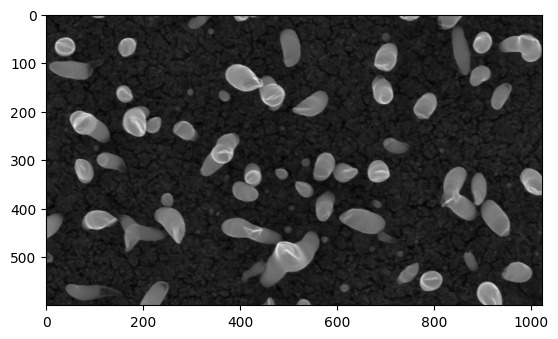

1/1 [==============================] - 1s 740ms/step
(600, 1024)


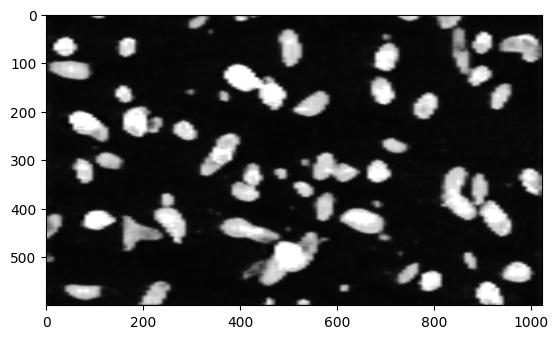

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2DTranspose
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model('unet_model.h5')

# Load and preprocess the test image
def load_image(image_path, target_size=(256, 128)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image[:600,:]
    plt.imshow(image, cmap='gray')
    plt.show()
    image = cv2.resize(image, target_size[::-1])
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)
    return image

# Load the test image
# image_path = 'masked2/2668.jpg'
image_path = 'F://DIP/Particles/612.jpg'
image = load_image(image_path)

# Predict the mask
mask = model.predict(np.array([image]))[0]

# Threshold the mask
mask[mask > 0.9] = 1


#resize the mask image
mask = cv2.resize(mask, (1024, 600))
print(mask.shape)
plt.imshow(mask, cmap='gray')
plt.show()
# # Save the mask
# cv2.imwrite('mask.png', mask)
